In [54]:
import gensim, logging
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [42]:
sentences = [['Hello', 'Could', 'you', 'please', 'provide', 'us', 'order', 'form'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

In [43]:
model = gensim.models.Word2Vec(sentences, min_count=1)

In [44]:
words = list(model.wv.vocab)
print(words)

['and', 'Hello', 'form', 'sentence', 'provide', 'Could', 'please', 'us', 'order', 'this', 'second', 'another', 'you', 'the', 'one', 'yet', 'final', 'is', 'more']


In [45]:
print(model)

Word2Vec(vocab=19, size=100, alpha=0.025)


In [46]:
print(model['order'])

[ 1.0976176e-03  2.8106570e-03 -2.2034443e-03  4.0227463e-03
 -1.3383772e-03  2.9752457e-03  2.7122435e-03  1.3512735e-03
  3.7325844e-03  7.0674776e-04 -1.9235815e-03  1.6137527e-03
  1.7610476e-03  4.9674315e-03  1.1266852e-03  1.3322884e-03
 -3.4988783e-03 -9.7234047e-04 -4.1977935e-03  4.3989629e-03
 -9.5110569e-05  6.3255022e-05 -1.1787164e-03  3.8276033e-03
 -3.6036232e-03  1.6317628e-03 -3.0476458e-03 -4.6080733e-03
 -4.7499924e-03  1.9398315e-03  1.0449818e-03 -3.4663153e-03
 -3.9556818e-03 -4.0759183e-03 -3.0755211e-04 -2.1283673e-03
 -3.4230540e-03 -2.4367033e-03  1.7554895e-03  1.7373721e-03
  6.8228098e-04 -2.6531690e-03 -2.5511065e-03  2.6509322e-03
 -1.3001802e-03  6.7467726e-04 -3.5031012e-03 -4.8664524e-03
  1.1719804e-03 -2.6773750e-03 -2.2495321e-03 -2.5944102e-03
 -3.0073924e-03  3.5927489e-03 -1.9516984e-03 -2.4979811e-03
 -2.6085617e-03 -2.5965527e-03  1.1102904e-03  1.1031816e-03
  4.7963791e-04 -3.8789031e-03 -4.3662969e-04 -2.4297114e-03
 -2.8910271e-03  4.62388

/Users/mojtaba/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [48]:
# save model
model.save('model.bin')
# load model
new_model = gensim.models.Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=19, size=100, alpha=0.025)


In [49]:
X = model[model.wv.vocab]

/Users/mojtaba/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [52]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [55]:
plt.scatter(result[:, 0], result[:, 1])

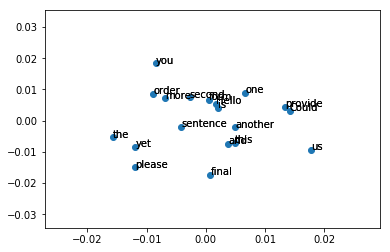

In [57]:
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

/Users/mojtaba/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


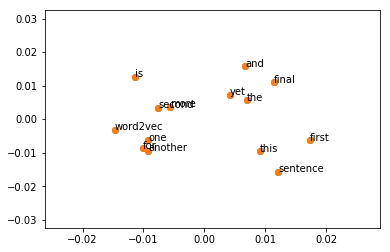

In [61]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = gensim.models.Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()